# **Importing Dependencies**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# **Importing Dataset and Basic Exploration**

In [ ]:
dataset = pd.read_csv('Titanic-Dataset.csv')

In [ ]:
dataset.shape

(891, 12)

In [ ]:
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


There are three possible values for Embark — Southampton, Cherbourg, and Queenstown.

In [ ]:
dataset.tail(3)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
dataset[['Age','Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


# **Data Cleaning**

### **Checking for Redundant Data**

In [ ]:
dataset.shape

(891, 12)

In [ ]:
dataset.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
dataset.shape

(891, 12)

### **Checking and Handling for Missing Values**

In [ ]:
dataset.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Gender,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
dataset.isnull()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


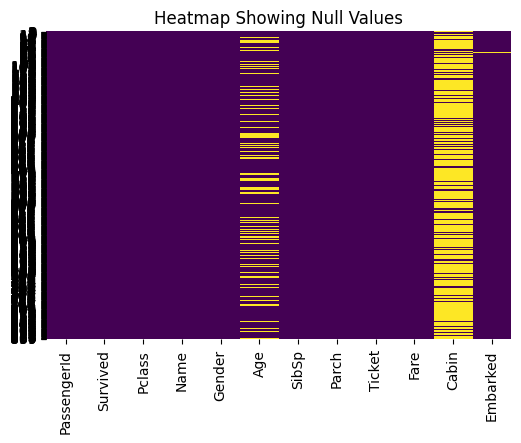

In [ ]:
null_data = dataset.isnull()
plt.figure(figsize=(6, 4))
sns.heatmap(null_data, cbar=False, cmap='viridis', yticklabels=True)
plt.title('Heatmap Showing Null Values')
plt.show()

First Dealing With **Age Column**

In [ ]:
dataset['Age'].isnull().sum()

177

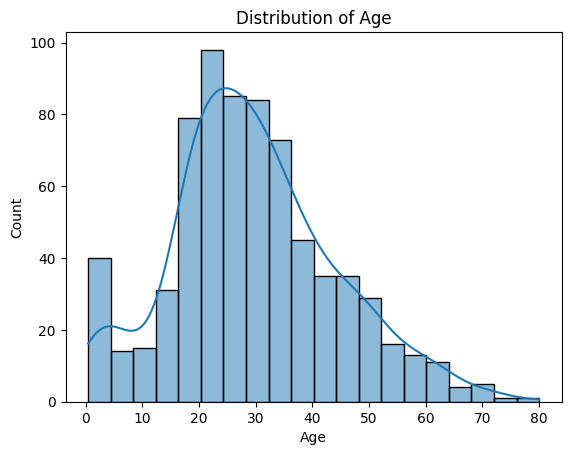

In [ ]:
sns.histplot(dataset['Age'],kde=True,palette="pastel")
plt.title('Distribution of Age')
plt.show()

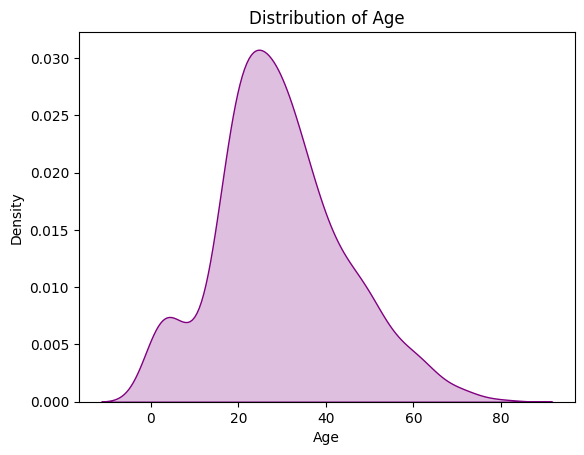

In [ ]:
sns.kdeplot(dataset['Age'],fill=True,color="purple")
plt.title('Distribution of Age')
plt.show()

In [ ]:
dataset['Age'] = dataset['Age'].fillna(round(dataset['Age'].mean(), 2))

Dealing with **Cabin Column**

In [ ]:
dataset['Cabin'].isnull().sum()

687

In [ ]:
dataset.drop('Cabin', axis=1, inplace=True)

In [ ]:
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


Dealing with **Embarked Column**

In [ ]:
dataset['Embarked'].isnull().sum()

2

In [ ]:
dataset[dataset['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [ ]:
dataset['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
dataset['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
dataset['Embarked'].mode()

,Embarked
0,S


In [ ]:
mode_value=dataset[dataset['Embarked'].notna()]['Embarked'].mode()[0]

In [ ]:
mode_value

'S'

In [ ]:
dataset['Embarked']=dataset['Embarked'].fillna(mode_value)

In [ ]:
dataset['Embarked'].isnull().sum()

0

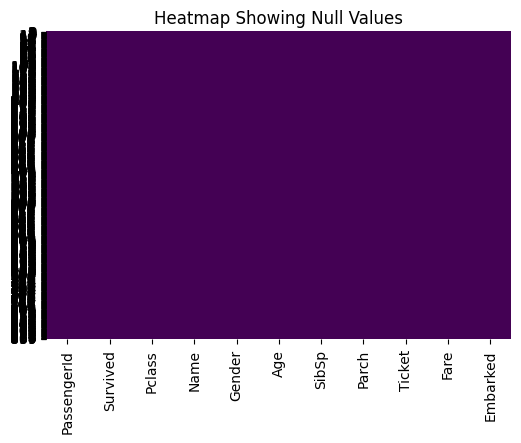

In [ ]:
null_data = dataset.isnull()
plt.figure(figsize=(6, 4))
sns.heatmap(null_data, cbar=False, cmap='viridis', yticklabels=True)
plt.title('Heatmap Showing Null Values')
plt.show()

### **Dropping Irrelevant Nominal Features/ Data Reduction**

In [ ]:
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [ ]:
dataset['PassengerId'].nunique()

891

In [ ]:
dataset['Name'].nunique()

891

In [ ]:
dataset['Ticket'].nunique()

681

In [ ]:
dataset.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [ ]:
dataset.head(3)

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


# **Exploratory Data Analysis**

In [ ]:
dataset.head(3)

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


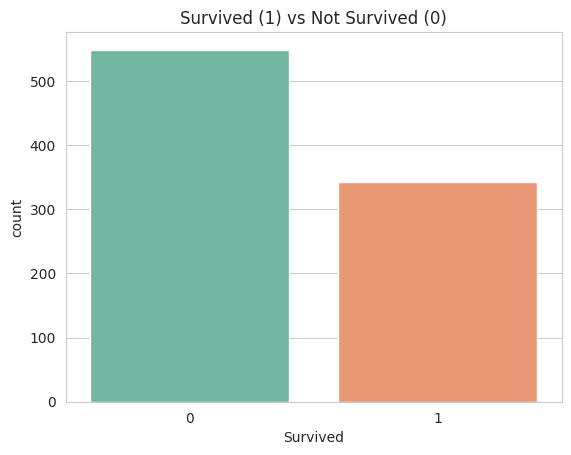

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x="Survived",data=dataset,palette='Set2')
plt.title('Survived (1) vs Not Survived (0)')
plt.show()

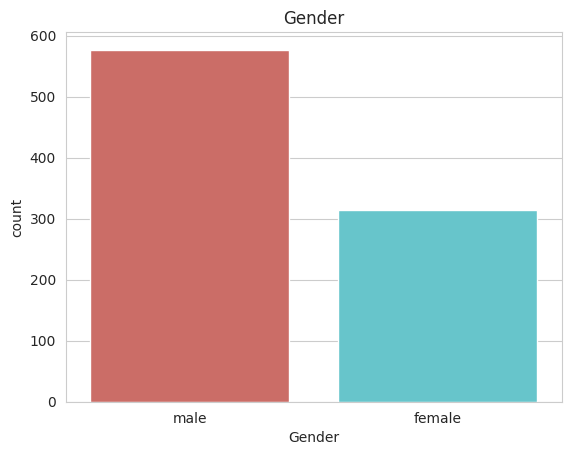

In [ ]:
sns.countplot(x="Gender",data=dataset,palette="hls")
plt.title('Gender')
plt.show()

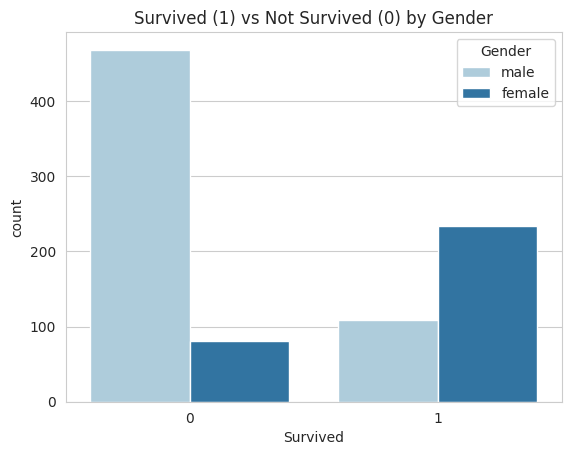

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x="Survived",hue="Gender",data=dataset,palette='Paired')
plt.title('Survived (1) vs Not Survived (0) by Gender')
plt.show()

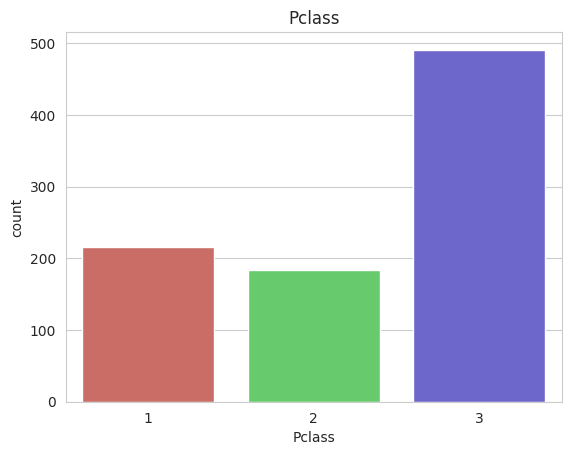

In [ ]:
sns.countplot(x="Pclass",data=dataset,palette="hls")
plt.title('Pclass')
plt.show()

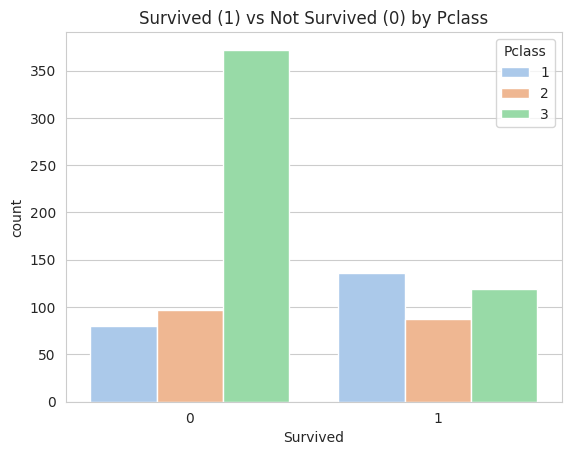

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x="Survived",hue="Pclass",data=dataset,palette='pastel')
plt.title('Survived (1) vs Not Survived (0) by Pclass')
plt.show()

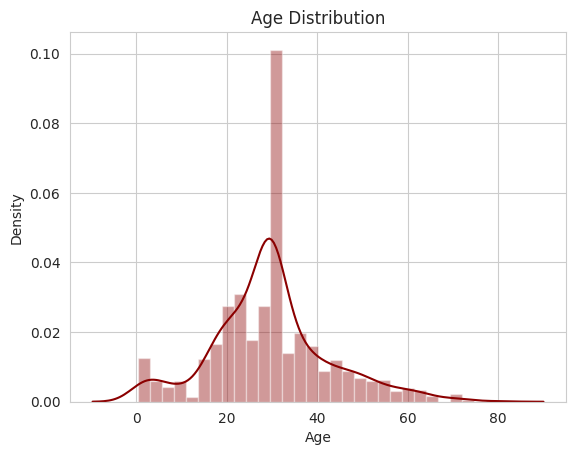

In [ ]:
sns.distplot(dataset['Age'],color='darkred')
plt.title('Age Distribution')
plt.show()


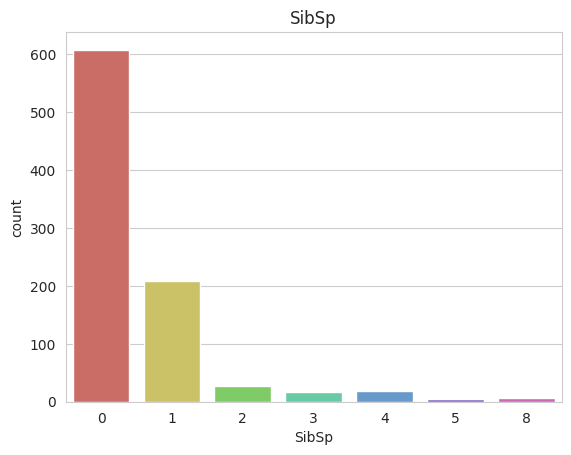

In [ ]:
sns.countplot(x="SibSp",data=dataset,palette="hls")
plt.title('SibSp')
plt.show()


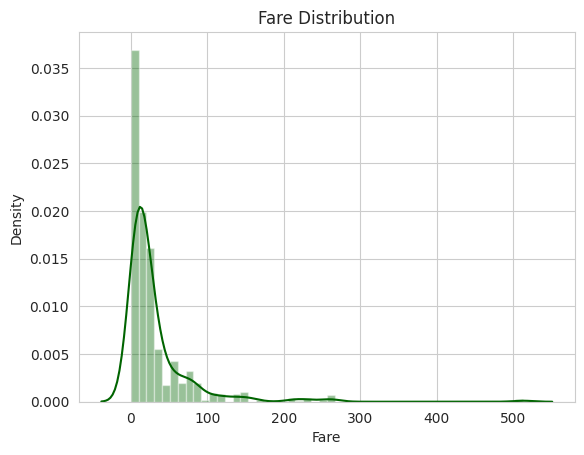

In [ ]:
sns.distplot(dataset['Fare'],color='darkgreen')
plt.title('Fare Distribution')
plt.show()

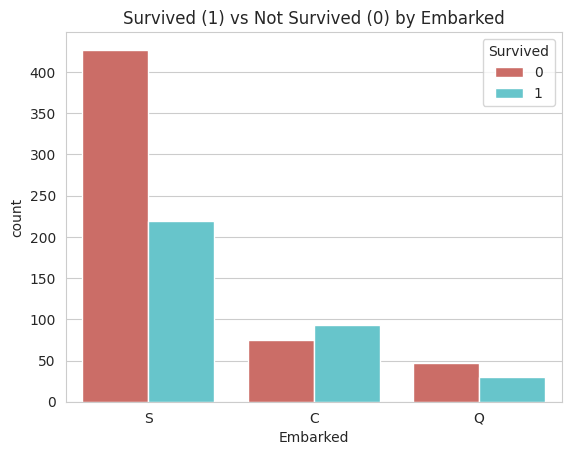

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x="Embarked",hue="Survived",data=dataset,palette='hls')
plt.title('Survived (1) vs Not Survived (0) by Embarked')
plt.show()

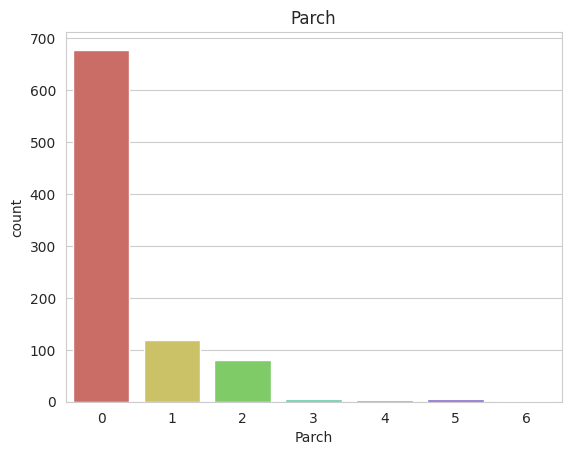

In [ ]:
sns.countplot(x="Parch",data=dataset,palette="hls")
plt.title('Parch')
plt.show()

# **Data Transformation**

### **Encoding Categorical Variables**

In [ ]:
dataset.head(3)

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [ ]:
dataset['Gender'] = dataset['Gender'].map({'male':1,'female':2})

In [ ]:
dataset.head(3)

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,2,38.0,1,0,71.2833,C
2,1,3,2,26.0,0,0,7.9250,S


In [ ]:
dataset['Embarked'] = dataset['Embarked'].map({'C':1,'Q':2,'S':3})

In [ ]:
dataset.head(3)

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,3
1,1,1,2,38.0,1,0,71.2833,1
2,1,3,2,26.0,0,0,7.9250,3


### **Scaling Numerical Variables (using Z-normalization)**

In [ ]:
scaler = StandardScaler()

In [ ]:
columns_to_scale = ['Age', 'Fare']

dataset[columns_to_scale] = scaler.fit_transform(dataset[columns_to_scale])

In [ ]:
dataset.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.592494,1,0,-0.502445,3
1,1,1,2,0.638776,1,0,0.786845,1
2,1,3,2,-0.284677,0,0,-0.488854,3
3,1,1,2,0.407912,1,0,0.420730,3
4,0,3,1,0.407912,0,0,-0.486337,3


# **Train Test Split**

In [ ]:
X = dataset.drop('Survived', axis=1)
y = dataset['Survived']

In [ ]:
X.head(3)

,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,3,1,-0.592494,1,0,-0.502445,3
1,1,2,0.638776,1,0,0.786845,1
2,3,2,-0.284677,0,0,-0.488854,3


In [ ]:
y.head(3)

,Survived
0,0
1,1
2,1


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.10,random_state=5,stratify=y)

In [ ]:
X_train.shape

(801, 7)

In [ ]:
X_test.shape

(90, 7)

In [ ]:
y_train.shape

(801,)

In [ ]:
y_test.shape

(90,)

# **Building ML Model using Naive Bayes Algorithm**

In [ ]:
classifier = BernoulliNB()
classifier.fit(X_train,y_train)

BernoulliNB()

# **Model Testing using Test Set**

In [ ]:
X_test_prediction = classifier.predict(X_test)

In [ ]:
accuracy_score(y_test,X_test_prediction)

0.6777777777777778

# **Ploting a Confusion Matrix**

In [ ]:
cm = confusion_matrix(y_test,X_test_prediction)

In [ ]:
print(cm)

[[45 10]
 [19 16]]


In [ ]:
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]

In [ ]:
print("Total True Positives are ",TP);
print("Total True Negatives are ",TN);
print("Total False Positives are ",FP);
print("Total False Negatives are ",FN);

Total True Positives are  45
Total True Negatives are  16
Total False Positives are  10
Total False Negatives are  19


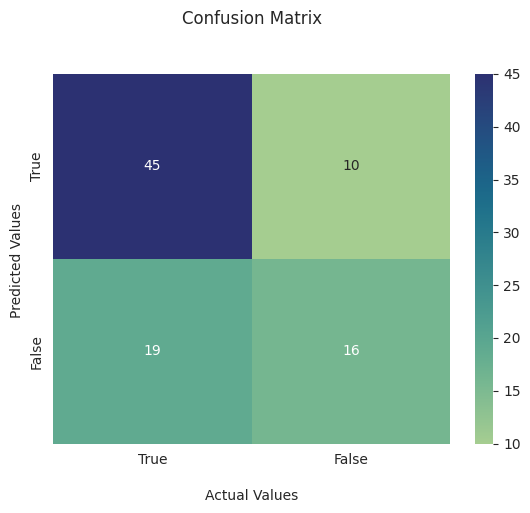

<Figure size 600x300 with 0 Axes>

In [ ]:
heatMap_cm = sns.heatmap(cm, annot=True, cmap='crest');
heatMap_cm.set_title('Confusion Matrix\n\n');
heatMap_cm.set_xlabel('\nActual Values');
heatMap_cm.set_ylabel('Predicted Values ');
heatMap_cm.xaxis.set_ticklabels(['True','False']);
heatMap_cm.yaxis.set_ticklabels(['True','False']);
plt.figure(figsize=(6,3));
plt.show();

# **Predicting a New Data Point**

In [ ]:
X

,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,3,1,-0.592494,1,0,-0.502445,3
1,1,2,0.638776,1,0,0.786845,1
2,3,2,-0.284677,0,0,-0.488854,3
3,1,2,0.407912,1,0,0.420730,3
4,3,1,0.407912,0,0,-0.486337,3
...,...,...,...,...,...,...,...
886,2,1,-0.207722,0,0,-0.386671,3
887,1,2,-0.823357,0,0,-0.044381,3
888,3,2,0.000054,1,2,-0.176263,3
889,1,1,-0.284677,0,0,-0.044381,1


In [ ]:
pclass = int(input('Enter Pclass (1,2,3): '))
gender = int(input('Enter Gender (1 for male, 2 for female): '))
age = float(input('Enter Age: '))
sibsp = int(input('Enter SibSp: '))
parch = int(input('Enter Parch: '))
fare = float(input('Enter Fare: '))
embarked = int(input('Enter Embarked (1 for C, 2 for Q, 3 for S): '))

Enter Pclass (1,2,3): 1
Enter Gender (1 for male, 2 for female): 2
Enter Age: 22
Enter SibSp: 0
Enter Parch: 0
Enter Fare: 400
Enter Embarked (1 for C, 2 for Q, 3 for S): 3


In [ ]:
[age,fare] = scaler.transform([[age,fare]])[0]

In [ ]:
output = classifier.predict([[pclass,gender,age,sibsp,parch,fare,embarked]])

In [ ]:
if(output[0]==1):
  print('Survived')
else:
  print('Not Survived')

Survived


# **Possible Future Directions**




1.   Increasing the dataset size for improved model performance.
2.   Using more sophisticated techniques to handle missing data.
3.   Exploring different scaling methods for feature standardization.
4.   Optimizing model parameters for better results.
5.   Implementing and comparing the performance of additional machine learning algorithms.